# Introducción a predicción de series de tiempo con ML

In [1]:
import yfinance as yf  # Para descargar históricos de acciones de Yahoo Finance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Definimos el ticker y las fechas que se quieren
ticker = "AAPL"  # Apple
fecha_inicio = "2025-08-01"
fecha_final = "2025-09-01"

# Se obtienen los datos históricos de Yahoo Finance
datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)

datos.columns = datos.columns.droplevel(1)

/tmp/ipython-input-247293145.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)
[*********************100%***********************]  1 of 1 completed


In [3]:
datos

Price,Close,High,Low,Open,Volume
Date,,,,,
2025-08-01,202.150589,213.337890,201.271582,210.630955,104434500
2025-08-04,203.119492,207.644355,201.451371,204.278165,75109300
2025-08-05,202.689957,205.107211,201.930824,203.169408,44155100
2025-08-06,213.008255,215.135845,205.356935,205.396898,108483100
2025-08-07,219.780563,220.599641,216.334477,218.631873,90224800
2025-08-08,229.090012,230.738135,219.001455,220.579666,113854000
2025-08-11,227.179993,229.559998,224.759995,227.919998,61806100
2025-08-12,229.649994,230.800003,227.070007,228.009995,55626200
2025-08-13,233.330002,235.000000,230.429993,231.070007,69878500


In [4]:
len(datos)

21

In [5]:
# Se obtiene la serie de diferencias
serie_precios = np.diff(datos['Close'])
serie_precios

array([ 0.96890259, -0.42953491, 10.31829834,  6.77230835,  9.30944824,
       -1.91001892,  2.47000122,  3.68000793, -0.55000305, -1.19000244,
       -0.69999695, -0.33000183, -4.55000305, -1.11000061,  2.86000061,
       -0.59999084,  2.1499939 ,  1.18000793,  2.06999207, -0.41999817])

In [6]:
len(serie_precios)

20

In [7]:
# Dependencia hacia atrás de la serie
num_lags = 3

# Construcción de los datos para entrenamiento
x=[]
y=[]
for i in range(len(serie_precios) - num_lags):
  x.append(serie_precios[i:i + num_lags])
  y.append(serie_precios[i+ num_lags])

# Se pasa a numpy arrays
x = np.array(x)
y = np.array(y)

In [8]:
x

array([[ 0.96890259, -0.42953491, 10.31829834],
       [-0.42953491, 10.31829834,  6.77230835],
       [10.31829834,  6.77230835,  9.30944824],
       [ 6.77230835,  9.30944824, -1.91001892],
       [ 9.30944824, -1.91001892,  2.47000122],
       [-1.91001892,  2.47000122,  3.68000793],
       [ 2.47000122,  3.68000793, -0.55000305],
       [ 3.68000793, -0.55000305, -1.19000244],
       [-0.55000305, -1.19000244, -0.69999695],
       [-1.19000244, -0.69999695, -0.33000183],
       [-0.69999695, -0.33000183, -4.55000305],
       [-0.33000183, -4.55000305, -1.11000061],
       [-4.55000305, -1.11000061,  2.86000061],
       [-1.11000061,  2.86000061, -0.59999084],
       [ 2.86000061, -0.59999084,  2.1499939 ],
       [-0.59999084,  2.1499939 ,  1.18000793],
       [ 2.1499939 ,  1.18000793,  2.06999207]])

In [9]:
len(x)

17

In [10]:
y

array([ 6.77230835,  9.30944824, -1.91001892,  2.47000122,  3.68000793,
       -0.55000305, -1.19000244, -0.69999695, -0.33000183, -4.55000305,
       -1.11000061,  2.86000061, -0.59999084,  2.1499939 ,  1.18000793,
        2.06999207, -0.41999817])

In [11]:
len(y)

17

In [12]:
# Se separa la serie en conjuntos de entrenamiento y prueba
train_test_split = 0.80
split_index = int(train_test_split * len(x))
print(split_index)
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

13


In [13]:
y_train

array([ 6.77230835,  9.30944824, -1.91001892,  2.47000122,  3.68000793,
       -0.55000305, -1.19000244, -0.69999695, -0.33000183, -4.55000305,
       -1.11000061,  2.86000061, -0.59999084])

In [14]:
y_test

array([ 2.1499939 ,  1.18000793,  2.06999207, -0.41999817])

Una vez que entendimos la idea del tipo de dependencia que queremos modelar, vamos a hacerlo un poquito más en grande

In [15]:
# Definimos el ticker y las fechas que se quieren
ticker = "AAPL"  # Apple
fecha_inicio = "2018-01-01"
fecha_final = "2025-01-01"

# Se obtienen los datos históricos de Yahoo Finance
datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)

datos.columns = datos.columns.droplevel(1)

# Se obtiene la serie de diferencias
serie_precios = np.diff(datos['Close'])

/tmp/ipython-input-2911311128.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  datos = yf.download(ticker, start = fecha_inicio, end = fecha_final)
[*********************100%***********************]  1 of 1 completed


In [16]:
# Dependencia hacia atrás de la serie
num_lags = 14
train_test_split = 0.80

# Construcción de los datos para entrenamiento
x=[]
y=[]
for i in range(len(serie_precios) - num_lags):
  x.append(serie_precios[i:i + num_lags])
  y.append(serie_precios[i+ num_lags])

# Se pasa a numpy arrays
x = np.array(x)
y = np.array(y)

# Se separa la serie en conjuntos de entrenamiento y prueba
split_index = int(train_test_split * len(x))
x_train = x[:split_index]
y_train = y[:split_index]
x_test = x[split_index:]
y_test = y[split_index:]

print(len(y_train))
print(len(y_test))

1396
350


Ya con esta idea, podemos usar nuestro modelo supervisado para regresión favorito

# Modelo dummy

Hace $\widehat{y} = \bar{y}$ (se puede usar también la mediana, otros cuantiles o de plano una constante que queramos)

In [17]:
from sklearn.dummy import DummyRegressor

In [18]:
 # Fitting the model
modelo = DummyRegressor(strategy = 'mean')
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro_test = np.reshape(modelo.predict(x_test), (-1, 1))

Voy a usar la función del libro para graficar las predicciones

In [19]:
def plot_train_test_values(window, train_window, y_train, y_test, y_predicted):
    prediction_window = window
    first = train_window
    second = window - first
    y_predicted = np.reshape(y_predicted, (-1, 1))
    y_test = np.reshape(y_test, (-1, 1))
    plotting_time_series = np.zeros((prediction_window, 3))
    plotting_time_series[0:first, 0] = y_train[-first:]
    plotting_time_series[first:, 1] = y_test[0:second, 0]
    plotting_time_series[first:, 2] = y_predicted[0:second, 0]
    plotting_time_series[0:first, 1] = np.nan
    plotting_time_series[0:first, 2] = np.nan
    plotting_time_series[first:, 0] = np.nan
    plt.plot(plotting_time_series[:, 0], label = 'Training data', color = 'black', linewidth = 2.5)
    plt.plot(plotting_time_series[:, 1], label = 'Test data', color = 'black', linestyle = 'dashed', linewidth = 2)
    plt.plot(plotting_time_series[:, 2], label = 'Predicted data', color = 'red', linewidth = 1)
    plt.axvline(x = first, color = 'black', linestyle = '--', linewidth = 1)
    plt.grid()
    plt.legend()

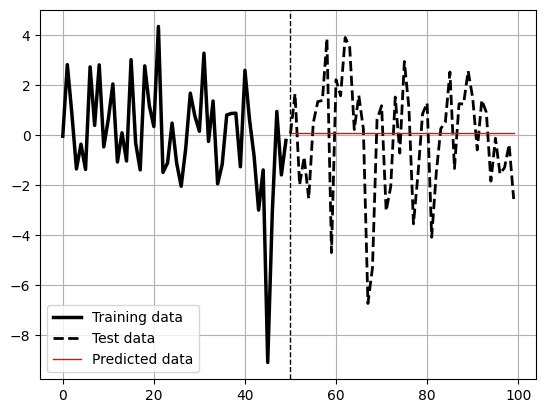

In [20]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro_test)

# Regresión lineal

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
# Ajuste de modelo
modelo = LinearRegression() # Por ahora sin hiperparámetros
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

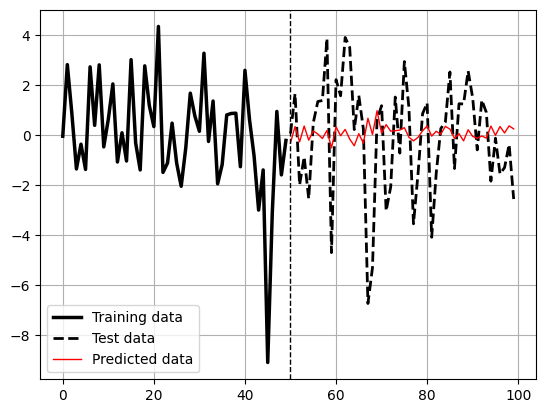

In [23]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión de vectores soporte

In [24]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [25]:
modelo = make_pipeline(StandardScaler(),
                       SVR(kernel = 'rbf', C = 1, gamma = 0.04, epsilon = 0.01))
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

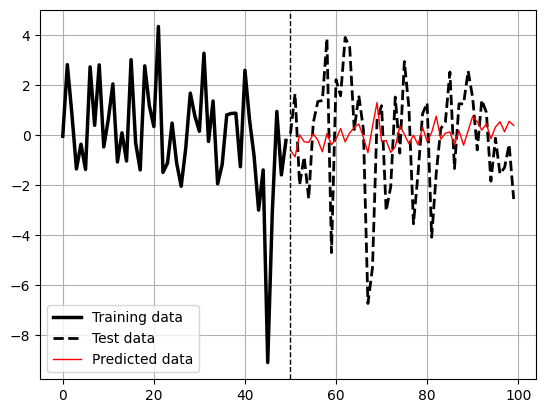

In [26]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Stochastic Gradient Descent Regression

In [27]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [28]:
modelo = make_pipeline(StandardScaler(), SGDRegressor(max_iter = 50, tol = 1e-3))
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

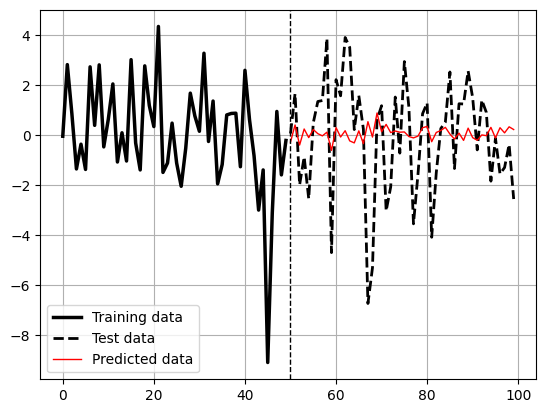

In [29]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión con $K$-vecinos más cercanos

In [30]:
from sklearn.neighbors import KNeighborsRegressor

In [31]:
num_vecinos = 10
modelo = KNeighborsRegressor(n_neighbors = num_vecinos)
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

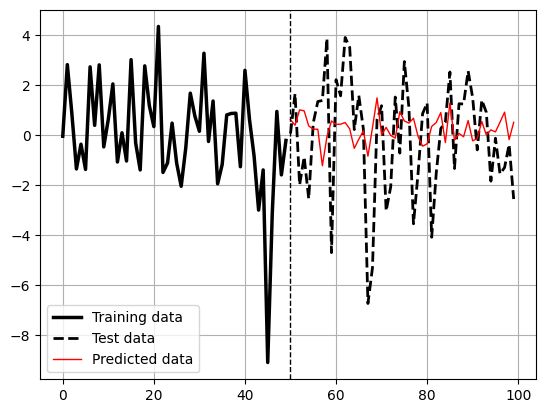

In [32]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión con un árbol de decisión

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
modelo = DecisionTreeRegressor(random_state = 2025)
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

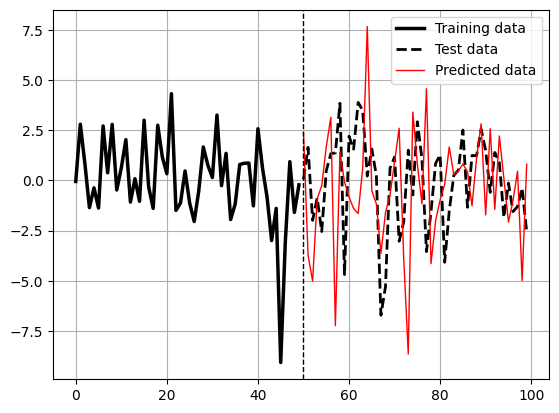

In [35]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión con Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
modelo = RandomForestRegressor(max_depth = 20, random_state = 2025)
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

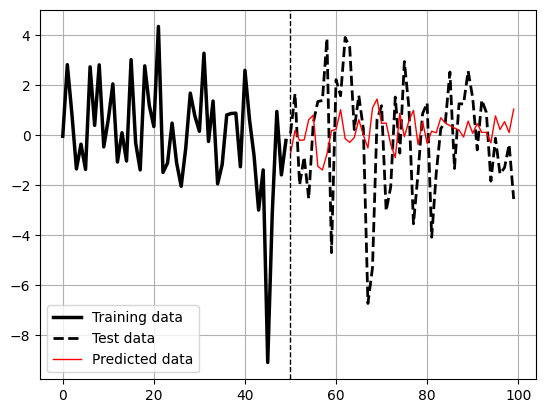

In [38]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión con AdaBoost

In [39]:
from sklearn.ensemble import AdaBoostRegressor

In [40]:
modelo = AdaBoostRegressor(random_state = 2025)
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

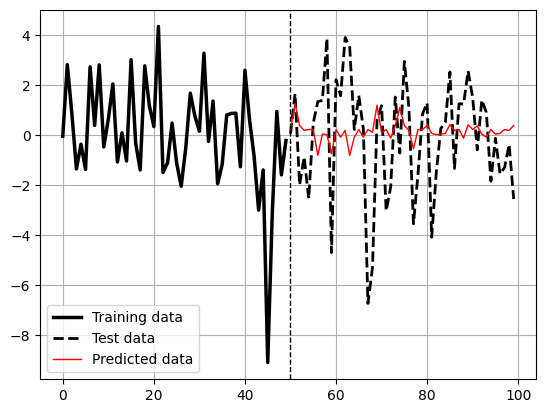

In [41]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)

# Regresión con XGBoost

In [42]:
from xgboost import XGBRegressor

In [43]:
modelo = XGBRegressor(random_state = 2025, n_estimators = 16, max_depth = 12)
modelo.fit(x_train, y_train)

# Predicción in-sample
y_gorro_train = np.reshape(modelo.predict(x_train), (-1, 1))
# Predicción out-of-sample
y_gorro = np.reshape(modelo.predict(x_test), (-1, 1))

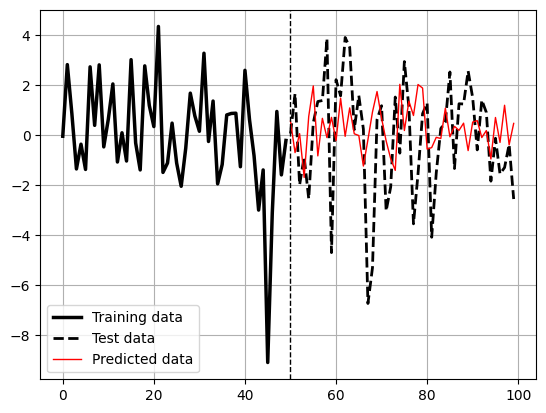

In [44]:
plot_train_test_values(100, 50, y_train, y_test, y_gorro)